In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
import sklearn.decomposition as skdc
import sklearn.linear_model as sklm 
import sklearn.tree as sktree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.pipeline as skpl
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [56]:
data = pd.read_csv('data/Pima_Indian_diabetes.csv')





In [57]:
data.shape

(768, 9)

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

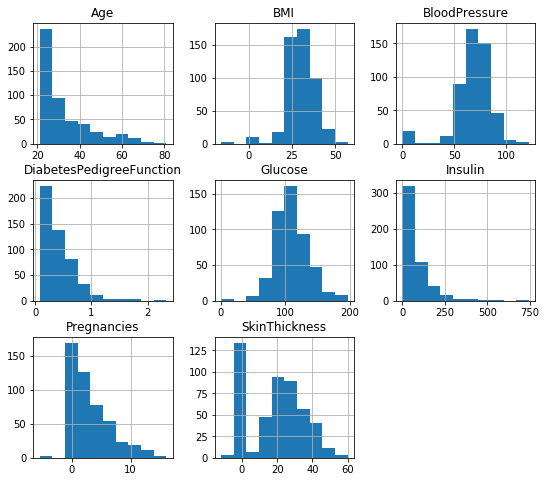

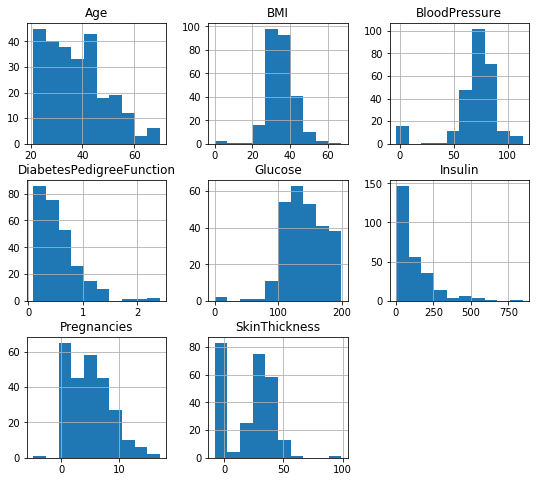

In [58]:
data.groupby('Outcome').hist(figsize=(9,8))

In [59]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,742.000000,752.000000,768.000000,746.000000,768.000000,757.000000,768.000000,749.000000,768.000000
mean,3.866601,119.966097,68.886078,20.309879,79.799479,31.711151,0.471876,33.761336,0.348958
std,3.479971,32.367659,19.427448,15.974523,115.244002,8.544789,0.331329,12.297409,0.476951
min,-5.412815,0.000000,-3.496455,-11.945520,0.000000,-16.288921,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243750,24.000000,0.000000
50%,3.000000,116.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.250000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
data.isnull().sum(axis=0)


Pregnancies                 26
Glucose                     16
BloodPressure                0
SkinThickness               22
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                         19
Outcome                      0
dtype: int64

In [61]:
#data['Pregnancies']=data['Pregnancies'].fillna((data['Pregnancies'].mean()))
data['Pregnancies']=data['Pregnancies'].fillna((0))
convert_dic={'Pregnancies':int}
data=data.astype(convert_dic)
negpreg=data[data['Pregnancies']<0].index
data.drop(negpreg,inplace=True)

In [62]:
nondiabglu=data[(data['Glucose'].isnull())& (data['Outcome']==0)].index
diabglu=data[(data['Glucose'].isnull())& (data['Outcome']==1)].index

In [63]:
nondiabglu

Int64Index([273, 351, 459, 475, 496, 499, 527, 530, 608, 665, 684], dtype='int64')

In [64]:

data['Glucose'][(data['Outcome']==0)].mean()


108.83257847755935

In [65]:
data['Glucose'][(data['Outcome']==1)].mean()

140.59710872252245

In [66]:
#data.replace(negpreg,120,inplace=True)
data['Glucose'].loc[nondiabglu]=data['Glucose'][(data['Outcome']==0)].mean()
data['Glucose'].loc[diabglu]=data['Glucose'][(data['Outcome']==0)].mean()

#data=data.replace(negpreg, value = 120) data.drop('Insulin',axis=1,inplace=True)data.drop('Insulin',axis=1,inplace=True)
#data['Glucose']=data['Glucose'].fillna((data['Glucose'].mean()))


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [67]:
data[272:274]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
272,3,122.000000,78.0,0.0,0.0,23.0,0.254,40.0,0
273,1,108.832578,78.0,50.0,45.0,33.2,0.422,21.0,0


In [68]:
data.isnull().sum(axis=0)

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness               22
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                         19
Outcome                      0
dtype: int64

In [69]:
#data['SkinThickness']=data['SkinThickness'].fillna((data['SkinThickness'].mean()))


In [70]:
negbmi=data[data['BMI']<=0].index
data.drop(negbmi,inplace=True)
data['BMI']=data['BMI'].fillna((data['BMI'].mean()))

In [71]:
negbmi.shape

(14,)

In [72]:
data['Age'].mean()




33.748093292679734

In [73]:

data['Age']=data['Age'].fillna((data['Age'].mean()))

In [74]:
data.shape

(751, 9)

In [75]:
negage=data[data['Age']<=0].index


In [76]:
data.drop(negage,inplace=True)

In [77]:

convert_Age={'Age':int}
data=data.astype(convert_Age)

In [78]:
data.shape

(751, 9)

In [79]:
negbp=data[data['BloodPressure']<=0].index

In [80]:
data.drop(negbp,inplace=True)


In [81]:
data['Insulin']=data['Insulin'].replace(0.0,data['Insulin'].mean())

In [82]:
data.drop('SkinThickness',axis=1,inplace=True)


In [83]:
X = data.loc[:, data.columns != 'Outcome']
Y = data.loc[:, data.columns == 'Outcome']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=8)

In [85]:
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [86]:
selected_features_df = pd.DataFrame({'Feature':list(x_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Feature,Scores
3,Insulin,1339.614846
1,Glucose,837.337110
6,Age,67.763711
4,BMI,63.455173
0,Pregnancies,59.765874
2,BloodPressure,14.265963
5,DiabetesPedigreeFunction,4.009341


In [87]:
#data.drop('DiabetesPedigreeFunction',axis=1,inplace=True)

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 723 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 723 non-null int64
Glucose                     723 non-null float64
BloodPressure               723 non-null float64
Insulin                     723 non-null float64
BMI                         723 non-null float64
DiabetesPedigreeFunction    723 non-null float64
Age                         723 non-null int64
Outcome                     723 non-null int64
dtypes: float64(5), int64(3)
memory usage: 50.8 KB


In [89]:
""""data.loc[data["Glucose"] == 0.0, "Glucose"] = np.NAN
data.loc[data["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
#data.loc[data["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
#data.loc[data["Insulin"] == 0.0, "Insulin"] = np.NAN
data.loc[data["BMI"] == 0.0, "BMI"] = np.NAN

data.isnull().sum()[1:6]"""


'"data.loc[data["Glucose"] == 0.0, "Glucose"] = np.NAN\ndata.loc[data["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN\n#data.loc[data["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN\n#data.loc[data["Insulin"] == 0.0, "Insulin"] = np.NAN\ndata.loc[data["BMI"] == 0.0, "BMI"] = np.NAN\n\ndata.isnull().sum()[1:6]'

In [90]:
data.shape



(723, 8)

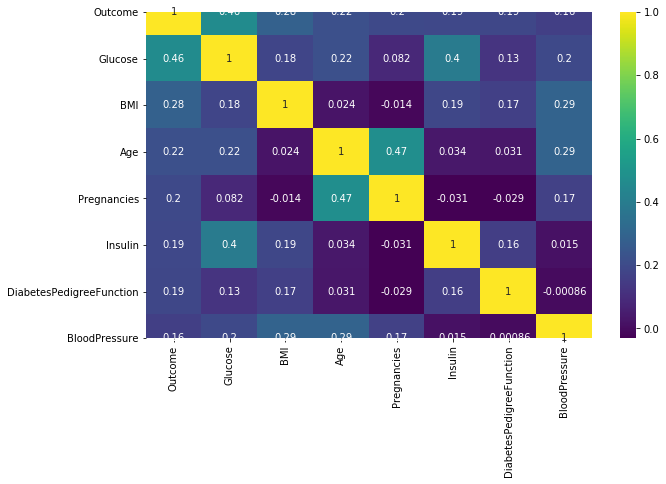

In [91]:
k = 8 #number of variables for heatmap
cols = data[list(data._get_numeric_data().columns)].corr().nlargest(k, 'Outcome')['Outcome'].index
cm = data[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

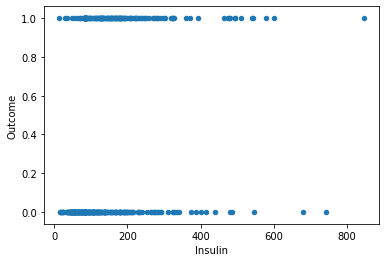

In [92]:
data.plot(kind='scatter',x='Insulin',y='Outcome',s=20)

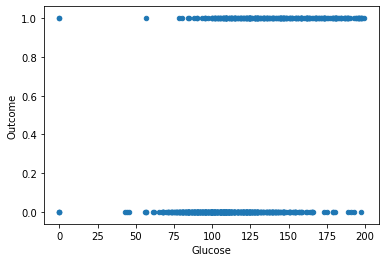

In [93]:
data.plot(kind='scatter',x='Glucose',y='Outcome',s=20)

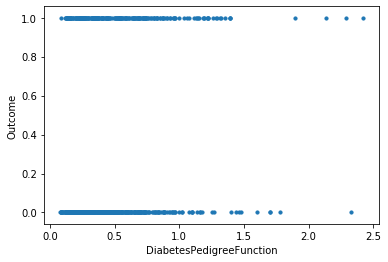

In [94]:
data.plot(kind='scatter',x='DiabetesPedigreeFunction',y='Outcome',s=10)

In [95]:
def standardization(x): #Define function to standardize the data, since all variables are not in the same units
    xmean = np.mean(x) ##calculate mean
    sd = np.std(x) ##calculate standard deviation 
    x_z = (x - xmean) / sd ##calculate standardized value to return
    return(x_z)

In [96]:

data_stnd = data.drop(['Outcome'], 1).apply(standardization,broadcast = True) 
##drop response variable and standardize predictor variables
data_stnd.head()
X = data_stnd #store predictor variables
y = data['Outcome'] #store response variable
pca = skdc.PCA()
pcafit = pca.fit_transform(X,y)
var_explained = pca.explained_variance_ratio_ 
pca = skdc.PCA(n_components = 7) #only include first 10 components
logreg = sklm.LogisticRegression(solver='lbfgs')#empty model space
#logreg=sktree.DecisionTreeClassifier(max_depth=5)
pipeline = skpl.Pipeline([('pca', pca), ('logistic', logreg)])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The broadcast argument is deprecated and will be removed in a future version. You can specify result_type='broadcast' to broadcast the result to the original dimensions
  """Entry point for launching an IPython kernel.


data=data.sample(frac=1)

In [97]:
data=data.sample(frac=1)

In [98]:
dfTrain = data[:575]
dfTest = data[576:]


In [99]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))

In [100]:
#normalisation
""""means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds"""

'"means = np.mean(trainData, axis=0)\nstds = np.std(trainData, axis=0)\ntrainData = (trainData - means)/stds\ntestData = (testData - means)/stds'

In [101]:
#diabetesCheck = LogisticRegression()
#diabetesCheck.fit(trainData, trainLabel)
pipeline.fit(trainData, trainLabel)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=7,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [102]:
kfold = KFold(n_splits=10, random_state=10) 
score = cross_val_score(pipeline, X, y, cv=kfold, scoring='accuracy').mean()

In [103]:
accuracy = pipeline.score(testData, testLabel)
print("accuracy = ", score* 100, "%")

accuracy =  76.63051750380517 %
